##Импорт библиотек и загрузка данных

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving updated_data_with_coords_22_10_2023.csv to updated_data_with_coords_22_10_2023.csv


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
#df_original = pd.read_csv("train.csv", sep=",")
#df = pd.read_csv("data_with_coords_21_10_2023.csv", sep =',')
df = pd.read_csv("updated_data_with_coords_22_10_2023.csv", sep=",")

##Анализ городов (количество банкоматов)

In [ ]:
df['city_with_type'].value_counts()

г Москва             538
г Новосибирск        171
г Красноярск         170
г Санкт-Петербург    160
г Омск               134
                    ... 
г Курганинск           1
г Малоярославец        1
г Миасс                1
г Таруса               1
г Лагань               1
Name: city_with_type, Length: 525, dtype: int64

In [ ]:
df['city_with_type'].nunique()

525

In [ ]:
city_values = df['city_with_type'].value_counts()

In [ ]:
#Топ городов с количеством банкоматов больше 50
top_cities = set(city_values[city_values>50].index)
top_cities

{'г Барнаул',
 'г Владивосток',
 'г Воронеж',
 'г Екатеринбург',
 'г Иркутск',
 'г Казань',
 'г Краснодар',
 'г Красноярск',
 'г Москва',
 'г Нижний Новгород',
 'г Новосибирск',
 'г Омск',
 'г Пенза',
 'г Пермь',
 'г Самара',
 'г Санкт-Петербург',
 'г Саратов',
 'г Тольятти',
 'г Томск',
 'г Тула',
 'г Тюмень',
 'г Улан-Удэ',
 'г Хабаровск',
 'г Челябинск',
 'г Якутск'}

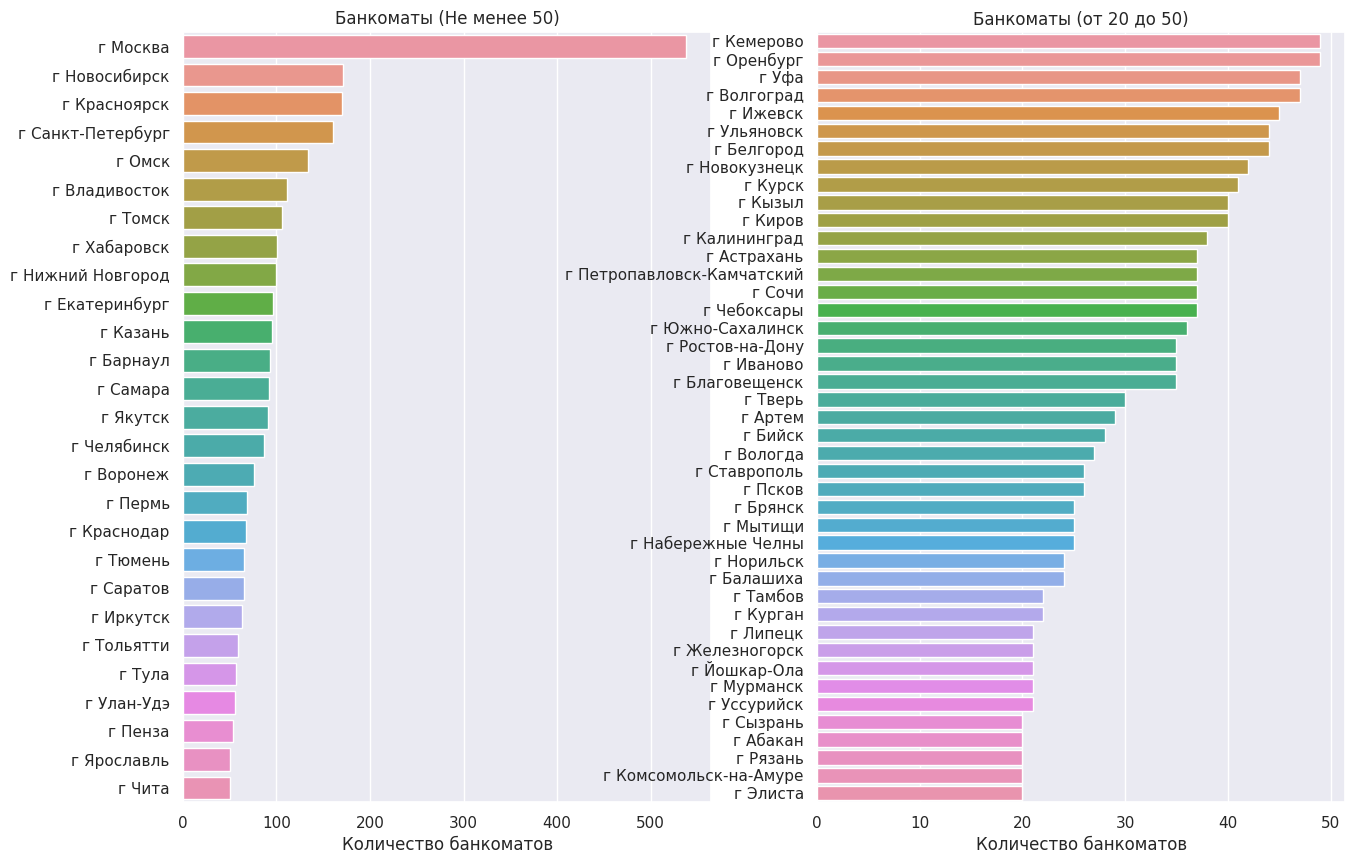

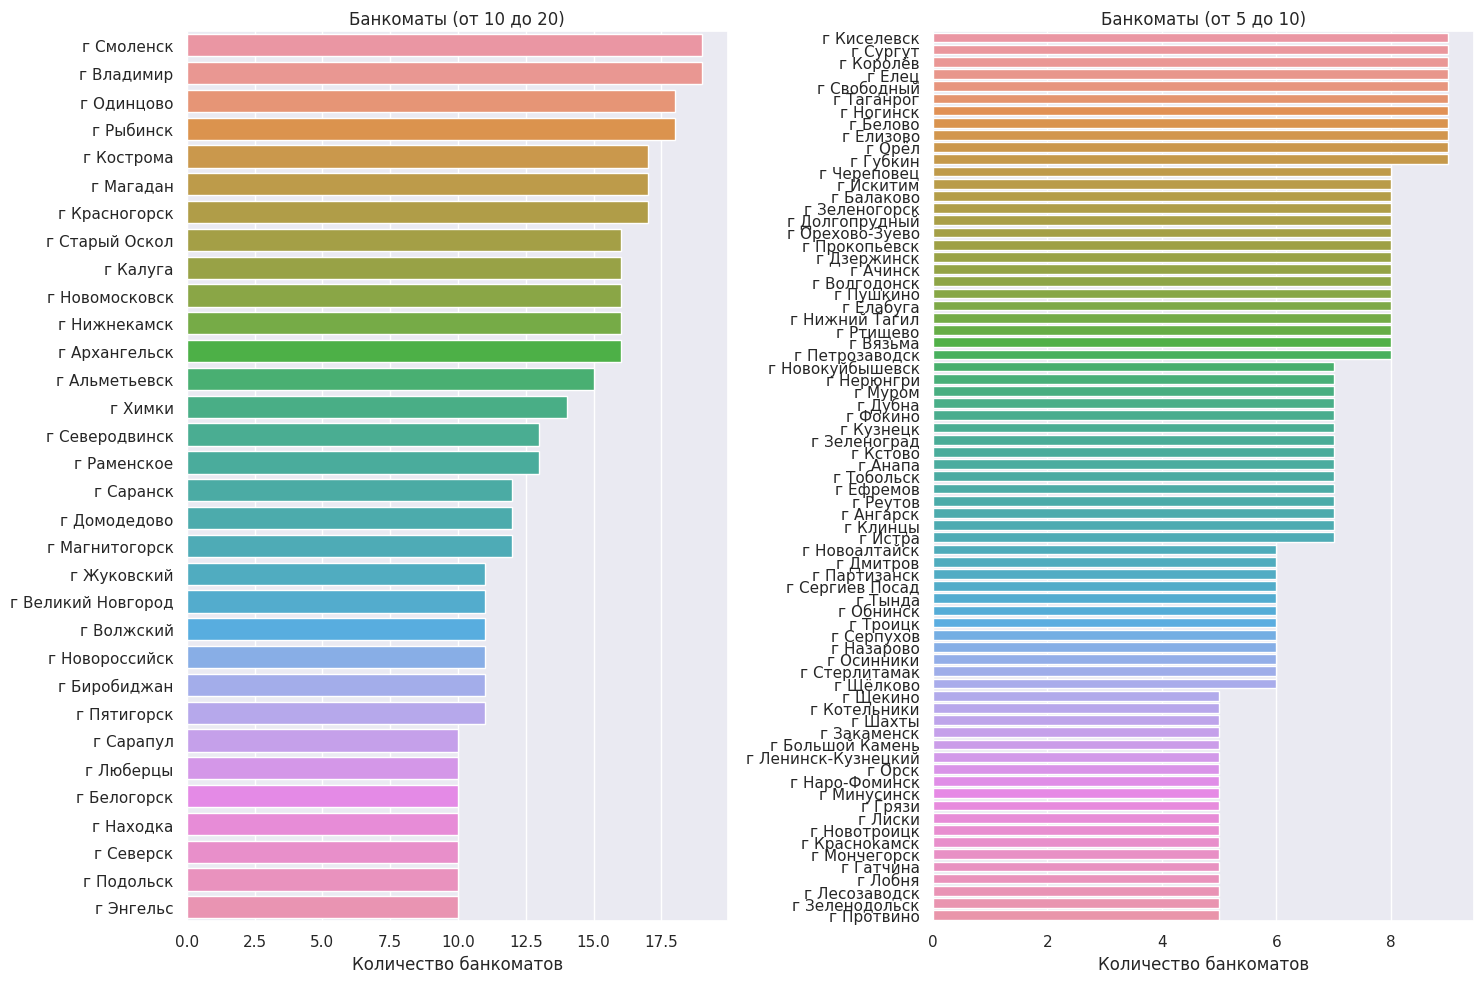

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df_filtered_more50 = df[(df['city_with_type'].value_counts().reindex(df['city_with_type']) >= 50).values]
df_filtered_20_50 = df[(df['city_with_type'].value_counts().reindex(df['city_with_type']) >= 20).values]
df_filtered_20_50 = df[df['city_with_type'].isin(df['city_with_type'].value_counts().index[(df['city_with_type'].value_counts() >= 20) & (df['city_with_type'].value_counts() < 50)])]
df_filtered_10_20 = df[df['city_with_type'].isin(df['city_with_type'].value_counts().index[(df['city_with_type'].value_counts() >= 10) & (df['city_with_type'].value_counts() < 20)])]
df_filtered_5_10 = df[df['city_with_type'].isin(df['city_with_type'].value_counts().index[(df['city_with_type'].value_counts() >= 5) & (df['city_with_type'].value_counts() < 10)])]


df_filtered_less5 = df[(df['city_with_type'].value_counts().reindex(df['city_with_type']) < 5).values]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 10))
#fig, (ax5) = plt.subplots(1, 1, figsize=(15, 10))

sns.countplot(y='city_with_type', data=df_filtered_more50, ax=ax1, order=df_filtered_more50['city_with_type'].value_counts().index)
ax1.set_title('Банкоматы (Не менее 50)')
ax1.set_ylabel('')
ax1.set_xlabel('Количество банкоматов')

sns.countplot(y='city_with_type', data=df_filtered_20_50, ax=ax2, order=df_filtered_20_50['city_with_type'].value_counts().index)
ax2.set_title('Банкоматы (от 20 до 50)')
ax2.set_ylabel('')
ax2.set_xlabel('Количество банкоматов')

sns.countplot(y='city_with_type', data=df_filtered_10_20, ax=ax3, order=df_filtered_10_20['city_with_type'].value_counts().index)
ax3.set_title('Банкоматы (от 10 до 20)')
ax3.set_ylabel('')
ax3.set_xlabel('Количество банкоматов')

sns.countplot(y='city_with_type', data=df_filtered_5_10, ax=ax4, order=df_filtered_5_10['city_with_type'].value_counts().index)
ax4.set_title('Банкоматы (от 5 до 10)')
ax4.set_ylabel('')
ax4.set_xlabel('Количество банкоматов')

'''
sns.countplot(y='city_with_type', data=df_filtered_less5, ax=ax5, order=df_filtered_less5['city_with_type'].value_counts().index)
ax5.set_title('Банкоматы (менее 5)')
ax5.set_ylabel('')
ax5.set_xlabel('Количество банкоматов')
'''

plt.tight_layout()
plt.show()